# Finding the Best Neighborhoods in Berlin for Opening a Cafe cum Restaurant | Data Science Capstone

# 1. Introduction

## 1.1 Background Discussion
Berlin is the largest city of Germany by both population and area. Its 3.77 million registered inhabitants also make it the most populous city of the European Union. Since 1990 after the fall of the Wall, Berlin is the capital of Germany and it established itself as a city of unlimited possibilities for travelers. The mixture of its historical significance, various festivals, diverse architecture, spectacular nightlife, and contemporary arts makes this city a magnet for tourists. Berlin’s 3.77 Million inhabitants are hosts to nearly 34 million overnight stays and 14 million visitors in year 2019 [1], which makes Berlin a top European destination – ranked third after London and Paris.

In addition, Berlin is also Europe’s leading economic force and its economy is growing rapidly for several years. In 2019, the nominal gross domestic product in Berlin was € 153.3 billion [2], which is 3% higher compared to the previous year and the number of people employed increased by 2.4% to more than 2 million [3].

All in all, the city’s rapidly growing economy, office businesses and tourisms make Berlin one of the best places to start up a new business, especially in Restaurants as the office businesses and the tourism are an important driver for restaurant industry.

## 1.2	Business Opportunity (Problem Description)
Now a days, most people, especially business employees, are eating more meals out of the home, because the work and lifestyle pressure often do not allow sufficient time for most of employees to prepare their own cuisine. Therefore, they rely on the Cafés and restaurants for their dietary needs, especially for breakfast and lunch. Similarly, tourist or business visitors also rely on the cafés and restaurants for their every meal. Berlin, where both the office businesses and tourism are growing rapidly since several years, provides huge opportunities for restaurant business. Reasonably priced restaurant in popular tourist and highly dense office places can attract both audiences – tourists and office employees. With given this scenario, we will analyze various factors to determine the best place in Berlin to open a café cum restaurant, where breakfast cum lunch or even brunch can be served. This report outlines some basic assumptions, data sets and data processing, and detailed analysis which can help us to select the best spot in Berlin for opening a café cum restaurant. In this procerss, we have assumed that money is not an issue for starting the business.

## 1.3	Target Audience
The key audience of this report would be anyone who wants to invest or open a restaurant in Berlin, or anyone in Berlin looking for a delicious breakfast, brunch, or lunch. The analysis will also help to office employees to find reasonable breakfast/lunch/brunch place close to office area.

# 2. Data
In order to find best spot in Berlin, various set of data like boroughs, neighborhoods, area, population, number of registered companies, and number of visitors, etc. are required. Unfortunately, all sets of data are not available from any single source. Hence, the various sets of data are retrieved from different sources and Foursquare API is used to retrieve the venue data.

Altogether, below 4 sets of data are used for our analysis:
#### 1. <u>Berlin Boroughs, Neighborhoods, Area and Population Data</u> (see 3.1.1) 
* This set of data is going to help us to get lists of every neighborhoods of Berlin with their size of area, boroughs and population in each neighborhood. It will also help us to figure out the densely populated neighborhoods or boroughs in Berlin. This dataset is available on Wikipedia page – “Verwaltungsgliederung Berlins” [4]. From there, it is retrieved by scrapping the wiki page; and then pre-processed, cleaned, and converted it into Pandas data-frame.

#### 2. <u>Berlin Registered Business Data</u> (see 3.1.2)
 - This set of data is going to give us a rough indication of most busy areas of berlin by business employees, at least on the workdays, by providing the number of businesses located within each borough. This set of data is downloaded from “Amt für Statistik Berlin-Brandenburg” website in csv format [5] and placed into a pandas data frame.  

#### 3. <u>Berlin Registered Tourist Data</u> (see 3.1.3)
 - This set of data is going to give us a rough indication of most busy areas of berlin by tourists, by providing the number of visitors and overnight stays visitors within each Borough. This set of data is also downloaded from “Amt für Statistik Berlin-Brandenburg” website in csv format [5] and placed into a pandas data frame.

#### 4. <u>Rent or buying price of property in Berlin</u> (see 3.1.4)
 - Even though we have assumed that money is not an issue, the information about the rent or buying price of property can help us to give rough idea of how expensive it will be to maintain a café cum restaurant business in each neighborhoods or borough. Fortunately, we found the average rent price in € per month-m² in 2019 for each neighborhoods of Berlin from “Homeday – mein Immobilienmakler” website [6]. From there, the data is retrieved by scrapping the web page [6]; and then cleaned and converted it into Pandas data-frame. 

#### 5. <u>Foursquare API</u>
 - Foursquare data is robust, and it allows us to retrieve information about the most popular spots in each neighborhood/borough in Berlin. This can also help us to get idea about busy areas for particular venue types.

# 3. Methodology

This section contains:
* 3.1 Data Scrapping, Wrangling, Cleaning and Processing (Week 1)
* 3.2 Merging Datasets and Importing the Geospatial Data (Week 2)
* 3.3 Foursquare Data Analysis (Week 2)
* 3.4 Neighborhood Clustering using K-Means Clustering (Week 2)

Starting with installing/importing the required libraries

In [1]:
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
from IPython.display import display_html
    
import requests # library to handle requests
from pandas.io.json import json_normalize # tranforming json file into a pandas dataframe library

# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
print('Folium installed')
import folium # map plotting library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Folium installed
Libraries imported.


## 3.1 Data Scrapping, Wrangling,  Cleaning and Processing (Week-1)

### 3.1.1 Berlin Neighborhoods, Boroughs, Area and Population Data
#### Scrapping the Wiki page - Getting the data - Coverting into pandas dataframe

In [2]:
# Scrapping the wiki page
received_page = requests.get('https://de.wikipedia.org/wiki/Verwaltungsgliederung_Berlins').text
soup = BeautifulSoup(received_page,'lxml')

# Getting the data
berlin_RawData = soup.find_all('table', {'class':"wikitable sortable zebra"})[1]

# Making necessary Lists to prepare the table
num = [] # to store index
neighborhoods = [] #In German known as "Ortsteile"
boroughs = [] # In German known as "Bezirke"
population = []
area = []
popDensity = []
i = 0

# Store data into Lists
for index, row in enumerate(berlin_RawData.findAll("tr")):
    if len(row.findAll('td')) == 6:
        num.append(row.findAll('td')[0].text) # Index: not important
        neighborhoods.append(row.findAll('td')[1].find(text=True)) # 
        boroughs.append(row.findAll('td')[2].find(text=True))#
        area.append(row.findAll('td')[3].find(text=True))
        population.append(row.findAll('td')[4].find(text=True))
        popDensity.append(row.findAll('td')[5].find(text=True))
        i+=1

# Create Table
columnsTitle = ['Neighborhoods', 'Boroughs', 'Area_sqkm', 'Population', 'Population Density']
rowsData = list(zip(neighborhoods, boroughs, area, population, popDensity))

# Convert it into Pandas DataFrame
df_berlinNbrBrgh = pd.DataFrame(data = rowsData, columns = columnsTitle)
df_berlinNbrBrgh.index = np.arange(1, len(df_berlinNbrBrgh) + 1)
print("Data types of each columns:\n", df_berlinNbrBrgh.dtypes)
print("\nThe shape of df_berlinDist dataframe is:", df_berlinNbrBrgh.shape)
df_berlinNbrBrgh

Data types of each columns:
 Neighborhoods         object
Boroughs              object
Area_sqkm             object
Population            object
Population Density    object
dtype: object

The shape of df_berlinDist dataframe is: (96, 5)


,Neighborhoods,Boroughs,Area_sqkm,Population,Population Density
1,Mitte,Mitte,"10,70\n",101.932\n,9526\n
2,Moabit,Mitte,"7,72\n",79.512\n,10.299\n
3,Hansaviertel,Mitte,"0,53\n",5.894\n,11.121\n
4,Tiergarten,Mitte,"5,17\n",14.753\n,2854\n
5,Wedding,Mitte,"9,23\n",86.688\n,9392\n
...,...,...,...,...,...
92,Waidmannslust,Reinickendorf,"2,30\n",10.958\n,4764\n
93,Lübars,Reinickendorf,"5,00\n",5.174\n,1035\n
94,Wittenau,Reinickendorf,"5,90\n",24.306\n,4120\n
95,Märkisches Viertel,Reinickendorf,"3,20\n",40.258\n,12.581\n


#### Cleaning

Due to German Database Source, the "comma" represents the decimal separators whereas the "dot/point" represents the thousands separator.<br><br>Hence, our DataFrame requires below listed pre-processing (Data cleaning):
* **Population Column:** *Remove dots/points and trailing newlines (\n) and Change the data type to int data type*
* **Area_sqkm Column:** *Replace commas by dots/points, Remove \n and Change the data type to float data type*
* **Population Density Column:** *Remove dots and \n; and Change the data type to int data type*
* **Neighborhoods Column:** *Remove numerical digits, \n and initial space; and insert commas to separate Neighborhoods' names*

In [3]:
# Remove initial space in Boroughs
df_berlinNbrBrgh['Boroughs'].replace(' ', "", regex=True, inplace=True)

# Remove \n and replace commas (decimal separators) by dots (thousands separator) in Area_sqkm
df_berlinNbrBrgh['Area_sqkm'].replace(['\,', '\n'], [".", ""], regex=True, inplace=True)

# Remove dots (thousands separator) and trailing newlines in Population
df_berlinNbrBrgh['Population'].replace(r'\.|\n', "", regex=True, inplace=True)

# Remove dots (thousands separator) and trailing newlines in Population Density
df_berlinNbrBrgh['Population Density'].replace(['\.', '\,', '\n'], ["", ".", ""], regex=True, inplace=True)

# Change the data types for Population, Area_sqkm and Population Density
df_berlinNbrBrgh = df_berlinNbrBrgh.astype({"Population":int, "Area_sqkm":float, "Population Density":float})

#df_berlinNbrBrgh.to_csv('Berlin_NeighborhoodsBoroughsAreaPopulation.csv')

# Print DataType, shape and DataFrame
print("Data types of each columns:\n", df_berlinNbrBrgh.dtypes)
print("\nThe shape of dataframe is:", df_berlinNbrBrgh.shape)
print("Total numbers of Boroughs in Berlin are:", len(df_berlinNbrBrgh.groupby('Boroughs').size()))
print("Total numbers of Neighborhoods in Berlin are:", len(df_berlinNbrBrgh.groupby('Neighborhoods').size()))
df_berlinNbrBrgh

Data types of each columns:
 Neighborhoods          object
Boroughs               object
Area_sqkm             float64
Population              int32
Population Density    float64
dtype: object

The shape of dataframe is: (96, 5)
Total numbers of Boroughs in Berlin are: 12
Total numbers of Neighborhoods in Berlin are: 96


,Neighborhoods,Boroughs,Area_sqkm,Population,Population Density
1,Mitte,Mitte,10.70,101932,9526.0
2,Moabit,Mitte,7.72,79512,10299.0
3,Hansaviertel,Mitte,0.53,5894,11121.0
4,Tiergarten,Mitte,5.17,14753,2854.0
5,Wedding,Mitte,9.23,86688,9392.0
...,...,...,...,...,...
92,Waidmannslust,Reinickendorf,2.30,10958,4764.0
93,Lübars,Reinickendorf,5.00,5174,1035.0
94,Wittenau,Reinickendorf,5.90,24306,4120.0
95,Märkisches Viertel,Reinickendorf,3.20,40258,12581.0


#### Processing - grouping on boroughs
Since Registerd Business and Tourist Data are avaialbe for each borough rather than each neighborhoods, we reduce the df_berlinNbrBrgh according to boroughs by merging other parameters on boroughs.

In [4]:
# Get Table - Group Area, Population and Population Density on Boroughs as sum for Area and Population, as mean for Population Density  
df_boroughsAreaPopPopDen = df_berlinNbrBrgh.groupby(["Boroughs"]).agg({'Area_sqkm': np.sum, "Population":np.sum, 'Population Density':np.mean}).reset_index()

# Get Table - Group Neighborhoods on Boroughs and Join each neighborhoods with comma
df_boroughsNeighborhoods = df_berlinNbrBrgh.groupby(["Boroughs"])["Neighborhoods"].apply(", ".join).reset_index()

# Combine both Tables
df_berlinData = df_boroughsNeighborhoods.merge(df_boroughsAreaPopPopDen, on='Boroughs')
df_berlinData = df_berlinData.round(pd.Series([1], index=['Population Density']))
df_berlinData.index = np.arange(1, len(df_berlinData) + 1)

df_berlinData

,Boroughs,Neighborhoods,Area_sqkm,Population,Population Density
1,Charlottenburg-Wilmersdorf,"Charlottenburg, Wilmersdorf, Schmargendorf, Gr...",64.62,342332,7387.6
2,Friedrichshain-Kreuzberg,"Friedrichshain, Kreuzberg",20.18,289762,14342.0
3,Lichtenberg,"Friedrichsfelde, Karlshorst, Lichtenberg, Falk...",52.02,291452,5853.2
4,Marzahn-Hellersdorf,"Marzahn, Biesdorf, Kaulsdorf, Mahlsdorf, Helle...",61.71,268548,4492.4
5,Mitte,"Mitte, Moabit, Hansaviertel, Tiergarten, Weddi...",39.48,384172,9792.3
6,Neukölln,"Neukölln, Britz, Buckow, Rudow, Gropiusstadt",44.91,329691,8353.0
7,Pankow,"Prenzlauer Berg, Weißensee, Blankenburg, Heine...",103.26,407765,4219.2
8,Reinickendorf,"Reinickendorf, Tegel, Konradshöhe, Heiligensee...",89.40,265220,4022.7
9,Spandau,"Spandau, Haselhorst, Siemensstadt, Staaken, Ga...",91.90,243977,3023.5
10,Steglitz-Zehlendorf,"Steglitz, Lichterfelde, Lankwitz, Zehlendorf, ...",102.47,308697,4074.6


### 3.1.2 Berlin Registered Business Data
#### Getting the data  and Coverting into pandas dataframe
Data is downloaded from website of “Statistical Office Berlin-Brandenburg” in csv format and saved it as 'EmployeeSizeClasses-BerlinDistricts-2018.csv'. 

In [5]:
# Load data from file and convert it into Pandas DataFrame
df_berlinBusinesses = pd.read_csv('EmployeeSizeClasses-BerlinDistricts-2018.csv', index_col=[0])
df_berlinBusinesses

,Boroughs,Businesses with employee size 0-9,Businesses with employee size 10-49,Businesses with employee size 50-249,Businesses with employee size 250 or more
1,Mitte,24251,3223,869,210
2,Friedrichshain-Kreuzberg,18874,1679,356,69
3,Pankow,20985,1313,267,63
4,Charlottenburg-Wilmersdorf,26373,2357,506,88
5,Spandau,6975,538,146,33
6,Steglitz-Zehlendorf,13309,869,182,40
7,Tempelhof-Schöneberg,16918,1593,340,75
8,Neukölln,11458,856,164,33
9,Treptow-Köpenick,10189,912,187,28
10,Marzahn-Hellersdorf,6843,660,147,22


#### Processing - Sum up all Businesses

In [6]:
# Sum up all slabs-businesses column into "Total Businesses" and delete all businesses-slabs columns

# List of Columns to be deleted
columnsToDelete = ['Businesses with employee size 0-9','Businesses with employee size 10-49',
                   'Businesses with employee size 50-249','Businesses with employee size 250 or more']

# Sum up all businesses into "Total Businesses"
df_berlinBusinesses["Total Businesses"] = df_berlinBusinesses[columnsToDelete].sum(axis=1)

# Delete all slabs columns
df_berlinBusinesses.drop(columnsToDelete, axis = 1, inplace = True)
df_berlinBusinesses.sort_values(by = ['Total Businesses'], ascending = False, inplace=True)
df_berlinBusinesses.index = np.arange(1, len(df_berlinBusinesses) + 1)

# Print DataType, shape and DataFrame
print("Data types of each columns:\n", df_berlinBusinesses.dtypes)
print("\nThe shape of dataframe is:", df_berlinBusinesses.shape)
print("Total numbers of registered businesses in Berlin are:", df_berlinBusinesses['Total Businesses'].sum(axis=0))
df_berlinBusinesses

Data types of each columns:
 Boroughs            object
Total Businesses     int64
dtype: object

The shape of dataframe is: (12, 2)
Total numbers of registered businesses in Berlin are: 192199


,Boroughs,Total Businesses
1,Charlottenburg-Wilmersdorf,29324
2,Mitte,28553
3,Pankow,22628
4,Friedrichshain-Kreuzberg,20978
5,Tempelhof-Schöneberg,18926
6,Steglitz-Zehlendorf,14400
7,Neukölln,12511
8,Treptow-Köpenick,11316
9,Reinickendorf,9966
10,Lichtenberg,8233


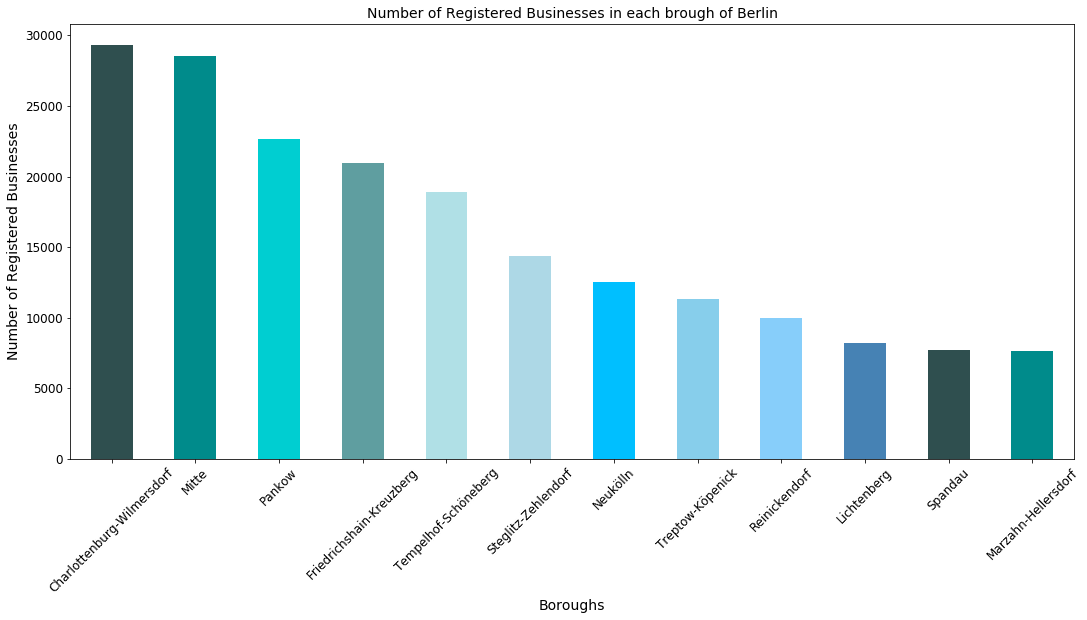

In [7]:
# Plot the bar graph
df_berlinBusinesses.plot.bar(x = 'Boroughs', y = 'Total Businesses', title = "Number of Registered Businesses in each brough of Berlin", legend = None, rot= 45, figsize = (18, 8), color=['darkslategray','darkcyan','darkturquoise','cadetblue', 'powderblue','lightblue','deepskyblue','skyblue','lightskyblue','steelblue'])
plt.ylabel('Number of Registered Businesses', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Boroughs', fontsize=14)
plt.title('Number of Registered Businesses in each brough of Berlin', fontsize = 14)
plt.show()

### 3.1.3 Berlin Registered Tourist Data
#### Getting the data  and Coverting into pandas dataframe
Data is downloaded from website of “Statistical Office Berlin-Brandenburg” in csv format and saved it as 'TourismusBerlin-2019.csv'. 

In [8]:
# Load data from file and convert it into Pandas DataFrame
df_berlinTourist = pd.read_csv('TourismusBerlin-2019.csv', index_col=[0])
df_berlinTourist

,Boroughs,Visitors in 2019,Overnight stays visitors in 2019
1,Mitte,6069884,14739386
2,Friedrichshain-Kreuzberg,1820781,4675128
3,Pankow,512864,1411473
4,Charlottenburg-Wilmersdorf,2698392,6459041
5,Spandau,271317,606062
6,Steglitz-Zehlendorf,211835,499837
7,Tempelhof-Schöneberg,838509,2109597
8,Neukölln,407795,923404
9,Treptow-Köpenick,300587,651275
10,Marzahn-Hellersdorf,92516,263915


#### Processing - Sum up Visitors and Overnight stays visitors in 2019

In [9]:
# Sum up Guests and Overnight stays guests as Total Visitors and delete Guests and Overnight stays guests columns
columnsToDelFromTouristData = ['Visitors in 2019', 'Overnight stays visitors in 2019']

df_berlinTourist["Total Visitors in 2019"] = df_berlinTourist[columnsToDelFromTouristData].sum(axis=1)

df_berlinTourist.drop(columnsToDelFromTouristData, axis=1, inplace=True)
df_berlinTourist.sort_values(by = ['Total Visitors in 2019'], ascending = False, inplace=True)
df_berlinTourist.index = np.arange(1, len(df_berlinTourist) + 1)

# Print DataType, shape and DataFrame
print("Data types of each columns:\n", df_berlinTourist.dtypes)
print("\nThe shape of dataframe is:", df_berlinTourist.shape)
print("Total numbers of tourists visited Berlin in year 2019 are:", df_berlinTourist['Total Visitors in 2019'].sum(axis=0))
df_berlinTourist

Data types of each columns:
 Boroughs                  object
Total Visitors in 2019     int64
dtype: object

The shape of dataframe is: (12, 2)
Total numbers of tourists visited Berlin in year 2019 are: 48087709


,Boroughs,Total Visitors in 2019
1,Mitte,20809270
2,Charlottenburg-Wilmersdorf,9157433
3,Friedrichshain-Kreuzberg,6495909
4,Tempelhof-Schöneberg,2948106
5,Pankow,1924337
6,Lichtenberg,1791645
7,Neukölln,1331199
8,Treptow-Köpenick,951862
9,Spandau,877379
10,Reinickendorf,732466


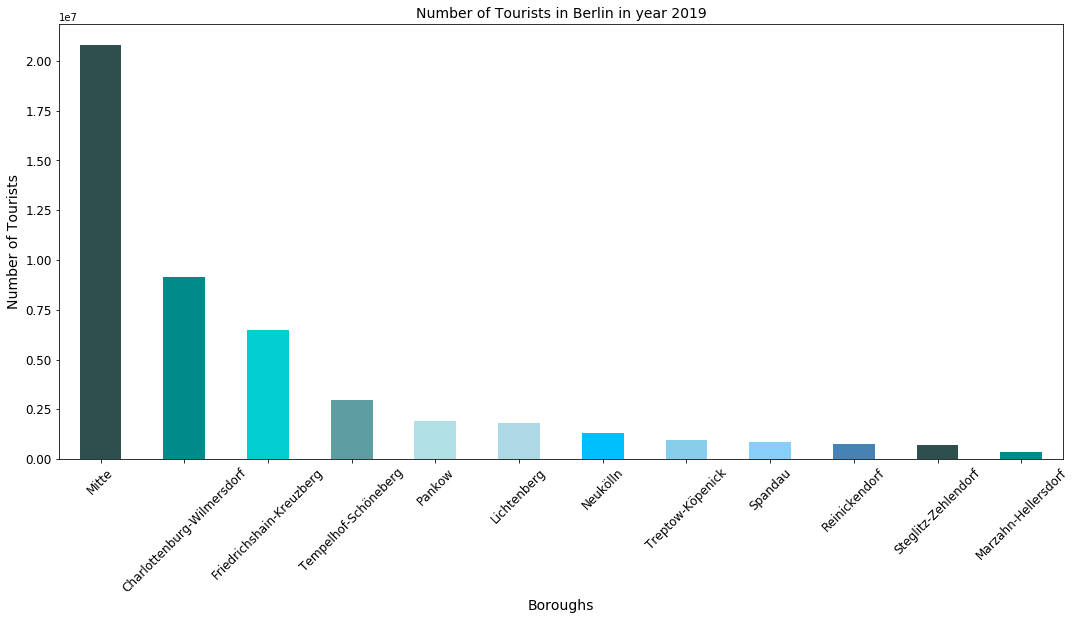

In [10]:
# Plot the bar graph
df_berlinTourist.plot.bar(x = 'Boroughs', y = 'Total Visitors in 2019', title = "Number of Tourists in Berlin in year 2019", legend = None, rot= 45, figsize = (18, 8), color=['darkslategray','darkcyan','darkturquoise','cadetblue', 'powderblue','lightblue','deepskyblue','skyblue','lightskyblue','steelblue'])
plt.ylabel('Number of Tourists', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Boroughs', fontsize=14)
plt.title('Number of Tourists in Berlin in year 2019', fontsize = 14)
plt.show()

### 3.1.4 Rent or buying price of property in Berlin
#### Scrapping the Wiki page - Getting the data - Coverting into pandas dataframe

In [11]:
# Scrapping the wiki page
received_page_homdayDe = requests.get('https://www.homeday.de/de/blog/mietpreise-berlin-2019').text
soupHomedayDe = BeautifulSoup(received_page_homdayDe,'lxml')

# Getting the data
berlin_RentPrice = soupHomedayDe.find('table')

# Making necessary Lists to prepare the table
neighborhoods = [] #In German known as "Ortsteile"
rentPricePerSqm_2016 = []
rentPricePerSqm_2019 = []
priceChange = []
i = 0
for index, row in enumerate(berlin_RentPrice.findAll("tr")):
    if len(row.findAll('td')) == 4:
        neighborhoods.append(row.findAll('td')[0].text)
        rentPricePerSqm_2016.append(row.findAll('td')[1].find(text=True))
        rentPricePerSqm_2019.append(row.findAll('td')[2].find(text=True))
        priceChange.append(row.findAll('td')[3].find(text=True))
        i+=1

# Create Table - we need only Neighhborhoods and Rent price in year 2019.             
columnsTitle_rentPrice = ['Neighborhoods', 'Rent Price in 2019 [€/m²-month]']
rowsData_rentPrice = list(zip(neighborhoods, rentPricePerSqm_2019))

df_berlinRentPrice = pd.DataFrame(data = rowsData_rentPrice, columns = columnsTitle_rentPrice)
df_berlinRentPrice.index = np.arange(1, len(df_berlinRentPrice) + 1)
print("Data types of each columns:\n", df_berlinRentPrice.dtypes)
print("\nThe shape of df_berlinDist dataframe is:", df_berlinRentPrice.shape)
df_berlinRentPrice

Data types of each columns:
 Neighborhoods                      object
Rent Price in 2019 [€/m²-month]    object
dtype: object

The shape of df_berlinDist dataframe is: (96, 2)


,Neighborhoods,Rent Price in 2019 [€/m²-month]
1,Tiergarten,"14,00 €"
2,Friedrichshain,"13,60 €"
3,Grunewald,"13,00 €"
4,Rummelsburg,"13,00 €"
5,Moabit,"12,60 €"
...,...,...
92,Neu-Hohenschönhausen,"8,00 €"
93,Hellersdorf,"7,90 €"
94,Falkenberg,"7,50 €"
95,Marzahn,"7,30 €"


#### Cleaning 

Due to German Database Source, the "comma" represents the decimal separators whereas the "dot/point" represents the thousands separator.<br><br>Hence, our DataFrame requires below listed pre-processing (Data cleaning):
* **Rent Price in 2019 [€/m²-mont] Column:** *Replace commas by dots/points, Remove € sign and Change the data type to float data type*

In [12]:
# Remove dots (thousands separator) and trailing newlines in Population
df_berlinRentPrice['Rent Price in 2019 [€/m²-month]'].replace(['\,', ' €'], [".", ""], regex=True, inplace=True)

# Change the data types for Population, Area_sqkm and Population Density
df_berlinRentPrice = df_berlinRentPrice.astype({"Rent Price in 2019 [€/m²-month]":float})

#df_berlinRentPrice.to_csv('Berlin_NeighbouthoodsRentPrice2019.csv')

# Print DataType, shape and DataFrame
print("Data types of each columns:\n", df_berlinRentPrice.dtypes)
print("\nThe shape of df_berlin dataframe is:", df_berlinRentPrice.shape)
df_berlinRentPrice

Data types of each columns:
 Neighborhoods                       object
Rent Price in 2019 [€/m²-month]    float64
dtype: object

The shape of df_berlin dataframe is: (96, 2)


,Neighborhoods,Rent Price in 2019 [€/m²-month]
1,Tiergarten,14.0
2,Friedrichshain,13.6
3,Grunewald,13.0
4,Rummelsburg,13.0
5,Moabit,12.6
...,...,...
92,Neu-Hohenschönhausen,8.0
93,Hellersdorf,7.9
94,Falkenberg,7.5
95,Marzahn,7.3


#### Processing - grouping on boroughs
Since Registerd Business and Tourist Data are avaialbe for each borough rather than each neighborhoods, we group the Rent Price data on to boroughs from the neighborhoods.

In [13]:
# Get neighborhoods and boroughs
df_berlinNeighborhoodsBoroughs = df_berlinNbrBrgh.loc[:,['Neighborhoods', 'Boroughs']]

# Merge boroughs into Rent Price dataframe
df_berlinBoroughRentPrice = df_berlinNeighborhoodsBoroughs.merge(df_berlinRentPrice, on='Neighborhoods')
df_berlinBoroughRentPrice.index = np.arange(1, len(df_berlinBoroughRentPrice) + 1)

# Neighborhoods and Rent Price group by boroughs; Rent Price as average or maximum for boroughs 
df_berlinBoroughRentPriceTemp = df_berlinBoroughRentPrice.groupby(["Boroughs"]).agg({'Rent Price in 2019 [€/m²-month]':np.max}).reset_index()
df_NeighborhoodsByBoroughs = df_berlinBoroughRentPrice.groupby(["Boroughs"])["Neighborhoods"].apply(", ".join).reset_index()
df_berlinBoroughRentPrice = df_NeighborhoodsByBoroughs.merge(df_berlinBoroughRentPriceTemp, on='Boroughs')

# Round up the Rent Price values,sort in descending order and start index from 1
df_berlinBoroughRentPrice = df_berlinBoroughRentPrice.round(pd.Series([1], index=['Rent Price in 2019 [€/m²-month]'])) # df_berlinBoroughRentPrice.sort_values(by=['Rent Price in 2019 [€/m²-month]'], inplace=True, ascending=False)
df_berlinBoroughRentPrice.sort_values(by=['Rent Price in 2019 [€/m²-month]'], inplace=True, ascending=False)
df_berlinBoroughRentPrice.index = np.arange(1, len(df_berlinBoroughRentPrice) + 1)

#df_berlinBoroughRentPrice.to_csv('Berlin_Boroughs_RentPrice.csv')

# Print DataType, shape and DataFrame
print("Data types of each columns:\n", df_berlinBoroughRentPrice.dtypes)
print("\nThe shape of dataFrame is:", df_berlinBoroughRentPrice.shape)
df_berlinBoroughRentPrice

Data types of each columns:
 Boroughs                            object
Neighborhoods                       object
Rent Price in 2019 [€/m²-month]    float64
dtype: object

The shape of dataFrame is: (12, 3)


,Boroughs,Neighborhoods,Rent Price in 2019 [€/m²-month]
1,Mitte,"Mitte, Moabit, Hansaviertel, Tiergarten, Weddi...",14.0
2,Friedrichshain-Kreuzberg,"Friedrichshain, Kreuzberg",13.6
3,Charlottenburg-Wilmersdorf,"Charlottenburg, Wilmersdorf, Schmargendorf, Gr...",13.0
4,Lichtenberg,"Friedrichsfelde, Karlshorst, Lichtenberg, Falk...",13.0
5,Steglitz-Zehlendorf,"Steglitz, Lichterfelde, Lankwitz, Zehlendorf, ...",12.4
6,Pankow,"Prenzlauer Berg, Weißensee, Blankenburg, Heine...",12.1
7,Tempelhof-Schöneberg,"Schöneberg, Friedenau, Tempelhof, Mariendorf, ...",11.8
8,Treptow-Köpenick,"Alt-Treptow, Plänterwald, Baumschulenweg, Joha...",11.6
9,Reinickendorf,"Reinickendorf, Tegel, Konradshöhe, Heiligensee...",10.0
10,Spandau,"Spandau, Haselhorst, Siemensstadt, Staaken, Ga...",10.0


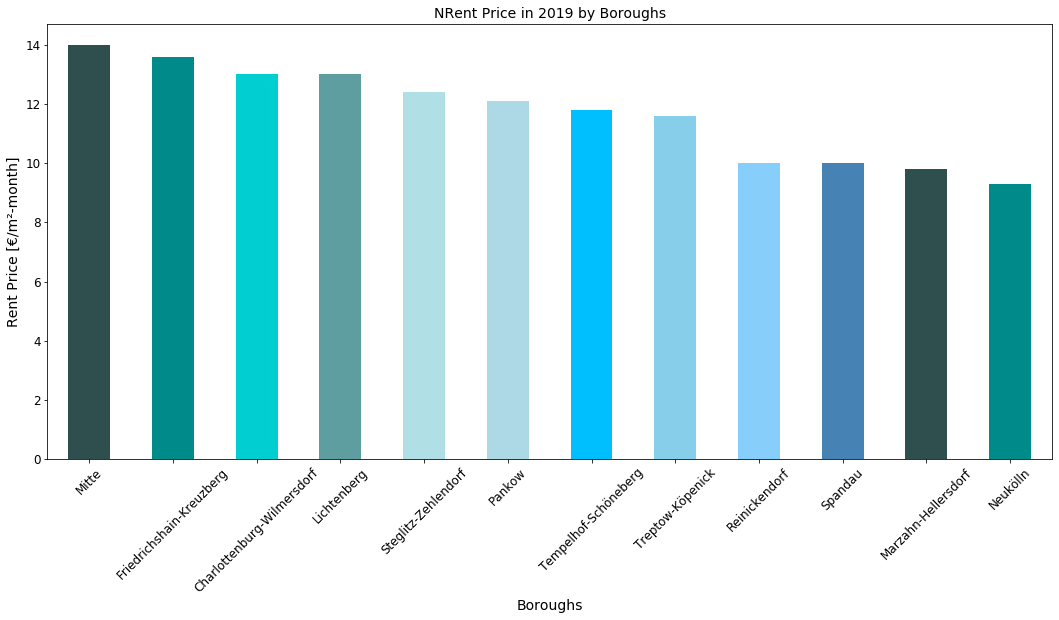

In [14]:
# Plot the bar graph
df_berlinBoroughRentPrice.plot.bar(x = 'Boroughs', y = 'Rent Price in 2019 [€/m²-month]', title = "Rent Price in 2019 by Boroughs", legend = None, rot= 45, figsize = (18, 8), color=['darkslategray','darkcyan','darkturquoise','cadetblue', 'powderblue','lightblue','deepskyblue','skyblue','lightskyblue','steelblue'])
plt.ylabel('Rent Price [€/m²-month]', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Boroughs', fontsize=14)
plt.title('NRent Price in 2019 by Boroughs', fontsize = 14)
plt.show()

## 3.2 Merging Datasets and Importing the Geospatial Data (Week 2)

## 3.3 Foursquare Data Analysis (Week 2)

## 3.4 Neighborhood Clustering using K-Means Clustering (Week 2)

# 4. Results and Discussion

# 5. Conclusion

# 6. References
[1]. Berlin.de, The Official Website of Berlin, Germany, accessed 21 July 2020, https://www.berlin.de/sen/wirtschaft/wirtschaft/branchen/tourismus/tourismus-in-zahlen/ <br>
[2]. Berliner Wirtschaft 2019 stark gewachsen, Wirtschaft aktuell, Senatsverwaltung für Wirtschaft, Energie und Betriebe, Germany, April 2020. <br>
[3]. Economic Development, The Official Website of Berlin, Germany, accessed 21 July 2020, https://www.berlin.de/en/business-and-economy/economic-center/5611367-4011028-economic-development.en.html <br>
[4]. Verwaltungsgliederung Berlins, accessed 21 July 2020. In Wikipedia. Retrieved from  https://de.wikipedia.org/wiki/Verwaltungsgliederung_Berlins <br>
[5]. Amt für Statistik Berlin-Brandenburg; Germany, accessed 21 July 2020, https://www.statistik-berlin-brandenburg.de/datenbank/inhalt-datenbank.asp <br>
[6]. Homeday.de, Homeday mein Immobilienmakler, accessed 25 July 2020, https://www.homeday.de/de/blog/mietpreise-berlin-2019/